# <center> Gradient Boosted Decision Tree Classifier
Gradient boosted decision tree ensemble is trained on feature set 2

## <font color='royalblue'> Get the data </p>

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(X_32test_std.keys())

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## <font color='royalblue'>Train and test the classifier

In [4]:
#Train the classifier

gradboost_clf =  GradientBoostingClassifier(n_estimators=500, max_depth=14, min_samples_split=4, max_features='auto',
                                           max_leaf_nodes=149)

start = time()
gradboost_clf.fit(X_32train_std, y_32_train)  
print("Training took %.2f seconds"%(time() - start))

print(" ")
print("Classifier:")
print(gradboost_clf)

Training took 5152.39 seconds
 
Classifier:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=14,
              max_features='auto', max_leaf_nodes=149,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classfier")
print(" ")
for snr in snrs:
    y_pred[snr] = gradboost_clf.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Gradient boosted decision trees accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classfier
 
Gradient boosted decision trees accuracy on -20 dB SNR samples =  0.13075
Gradient boosted decision trees accuracy on -18 dB SNR samples =  0.117
Gradient boosted decision trees accuracy on -16 dB SNR samples =  0.12425
Gradient boosted decision trees accuracy on -14 dB SNR samples =  0.1245
Gradient boosted decision trees accuracy on -12 dB SNR samples =  0.13775
Gradient boosted decision trees accuracy on -10 dB SNR samples =  0.159
Gradient boosted decision trees accuracy on -8 dB SNR samples =  0.2485
Gradient boosted decision trees accuracy on -6 dB SNR samples =  0.3325
Gradient boosted decision trees accuracy on -4 dB SNR samples =  0.394
Gradient boosted decision trees accuracy on -2 dB SNR samples =  0.469
Gradient boosted decision trees accuracy on 0 dB SNR samples =  0.584
Gradient boosted decision trees accuracy on 2 dB SNR samples =  0.70025
Gradient boosted decision trees accuracy on 4 dB SNR samples =  0.81825
Gradient boosted decision trees accuracy

## <font color='royalblue'> Visualize classifier performance

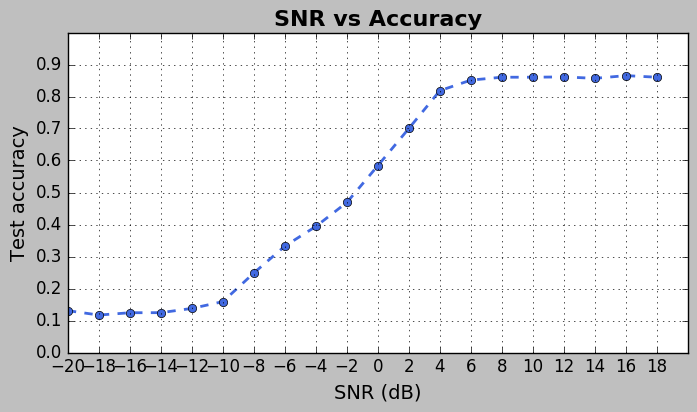

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [4]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = gradboost_clf.predict(X_32test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_32_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    476     1      0     0     1     24     26     6
BPSK      0   483      0     0     2      0      2     2
CPFSK     1     1    499     0     0      6      4     0
GFSK      2     0      1   500     0      0      2     0
PAM4      1    11      0     0   496      4      2     0
QAM16     4     3      0     0     0    235    193     1
QAM64     5     1      0     0     0    213    262     1
QPSK     11     0      0     0     1     18      9   490


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.89  0.00   0.00  0.00  0.00   0.04   0.05  0.01
BPSK   0.00  0.99   0.00  0.00  0.00   0.00   0.00  0.00
CPFSK  0.00  0.00   0.98  0.00  0.00   0.01   0.01  0.00
GFSK   0.00  0.00   0.00  0.99  0.00   0.00   0.00  0.00
PAM4   0.00  0.02   0.00  0.00  0.96   0.01   0.00  0.00
QAM16  0.01  0.01   0.00  0.00  0.00   0.54   0.44  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.44   0.54  0.00
QPSK   0.02  0.00   0.00  0.00  0.00   0.03   0.02  0.93


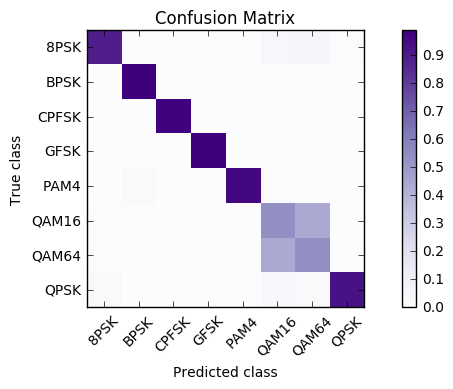

In [6]:
# Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(gradboost_clf, "grad_boost2.1.pkl")

['grad_boost2.1.pkl']

In [2]:
import pickle
from sklearn.externals import joblib
gradboost_clf = joblib.load("grad_boost2.1.pkl")